In [9]:
!hydromt --models

hydroMT model plugins: sfincs (v0.2.1)


In [4]:
fn_ini = "sfincs_forcing_wg_climx.ini"
with open(fn_ini, "r") as f:
    txt = f.read()
print(txt)

[setup_config]
tref = 19810103 000000
tstart = 19810103 000000
tstop = 20101231 000000
alpha = 0.5
zsini = 0.5 

[setup_h_forcing]
geodataset_fn = data/gtsm_locations_bangkok.csv  # waterlevel gauge locations
timeseries_fn = data/gtsm_timeseries.csv  # waterlevel time series --> Try to run it with 0 or leave empty
buffer = 1e4                    # buffer around model region to select gauges

[setup_q_forcing_from_grid]     
discharge_fn = wflow_output_climx     # Discharge forcing from wflow ['discharge']
uparea_fn = wflow_static_climx         # Static output from wflow for upstream areas
wdw = 2
rel_error = 0.1 ## rel error en abs error



In [ ]:
!hydromt update --help

In [2]:
os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

In [5]:
!hydromt update sfincs ./sfincs_bangkok -o ./sfincs_update_bangkok_wg_1981-2010b_climx_1 -i sfincs_forcing_wg_climx.ini -d P:/11206881-climate-risk-in-cities/msc_theses/Jasper/hydromt_wflow-main/Case_studies/output/wflow_forcing.yml --dd -vv

2022-06-16 10:04:06,973 - update - log - DEBUG - Writing log messages to new file \\storage009.directory.intra\11206881-climate-risk-in-cities\msc_theses\Jasper\hydromt_sfincs-main\Case_studies\sfincs_update_bangkok_wg_1981-2010b_climx_1\hydromt.log.
2022-06-16 10:04:06,974 - update - log - INFO - HydroMT version: 0.4.6.dev
2022-06-16 10:04:06,975 - update - main - INFO - Updating sfincs model at \\storage009.directory.intra\11206881-climate-risk-in-cities\msc_theses\Jasper\hydromt_sfincs-main\Case_studies\sfincs_bangkok (r).
2022-06-16 10:04:06,976 - update - main - INFO - Output dir: \\storage009.directory.intra\11206881-climate-risk-in-cities\msc_theses\Jasper\hydromt_sfincs-main\Case_studies\sfincs_update_bangkok_wg_1981-2010b_climx_1
2022-06-16 10:04:06,976 - update - main - INFO - Additional data sources: ('\\\\storage009.directory.intra\\11206881-climate-risk-in-cities\\msc_theses\\Jasper\\hydromt_wflow-main\\Case_studies\\output\\wflow_forcing.yml',)
2022-06-16 10:04:06,977 - u

In [6]:
%matplotlib inline
from hydromt_sfincs import SfincsModel
import matplotlib.pyplot as plt

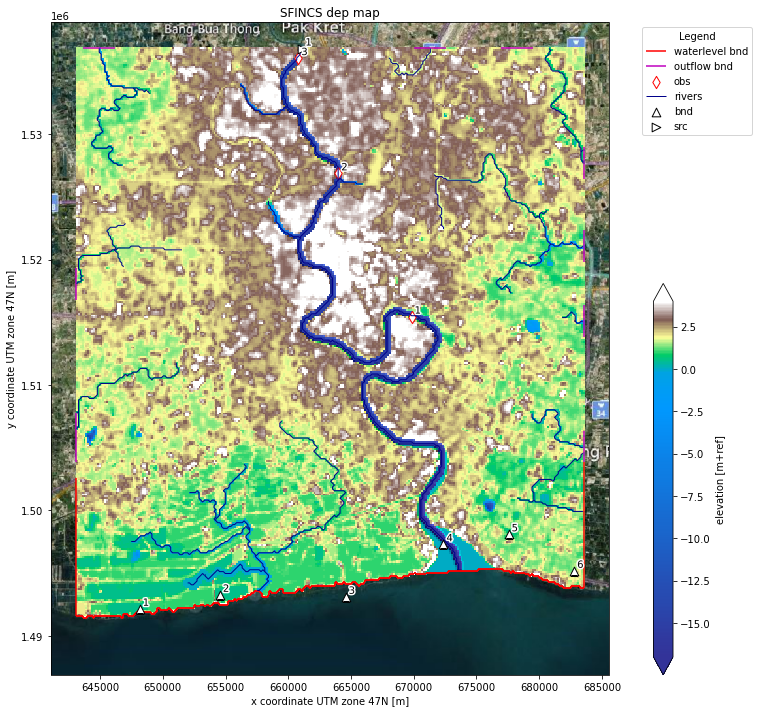

In [7]:
# define the model's configuration file
root = r"./sfincs_update_bangkok_wg_historic_1"

# read the model with hydromt sfincs methods
mod = SfincsModel(root=root, mode="r")
mod.read()
_ = mod.plot_basemap(figsize=(16, 12))

(<Figure size 432x648 with 3 Axes>,
 array([<AxesSubplot:title={'center':'SFINCS waterlevel forcing (bzs)'}, ylabel='waterlevel\n[m+ref]'>,
        <AxesSubplot:title={'center':'SFINCS discharge forcing (dis)'}, ylabel='discharge\n[m3.s-1]'>,
        <AxesSubplot:title={'center':'SFINCS precipitation forcing (precip)'}, ylabel='precipitation\n[mm.hr-1]'>],
       dtype=object))

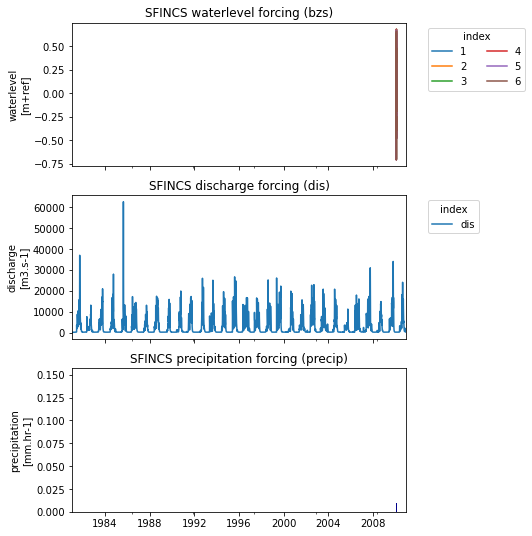

In [8]:
mod.plot_forcing()